In [1]:
from core.agent import set_nodes_for_ai_content_creator, set_agent_graph
from core.agent_state import AgentState
from llm.llm import llm
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)




pandasai_agent_node, article_agent_node = set_nodes_for_ai_content_creator(llm)

workflow = set_agent_graph(AgentState, pandasai_agent_node, article_agent_node)

graph = workflow.compile()

# Get the Mermaid graph definition
mermaid_graph = graph.get_graph(xray=True).draw_mermaid()

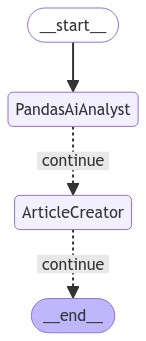

In [2]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [3]:
# Print the Mermaid graph definition to the console
events = graph.stream(
    {
        "messages": [
            HumanMessage(
                content="create a bar chart with the top 10 countries with highest temperature increase in the last 10 years."
                        "Then create a journal article describing this insight"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

KeyError: 'ArticleCreator'